### Project Code 
Created by Meghna Muralidharan



In [214]:
# Import necessary packages
import requests
import json
import pandas as pd
import numpy as np
import textblob
from textblob import TextBlob
import nltk
!pip install stop_words
nltk.download('wordnet')
nltk.download('stopwords')
from textblob import Word
from stop_words import get_stop_words
stop = get_stop_words('english')
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import html.parser
from datetime import datetime

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## **1) Data Extraction and Cleaning**

In [0]:
# Function to extract data from 4chan API for four categories namely, Technology, TV & Film, Food & Cooking and Literature

def get_data(genre,title):
  url = "https://a.4cdn.org/"+genre+'/catalog.json'
  request_data = requests.get(url)
  data = json.loads(request_data.text)
  from pandas.io.json import json_normalize
  df = pd.DataFrame()
  for i in range(len(data)):
    d = data[i]
    df = df.append(json_normalize(d['threads']))
  # Add a new column to indicate the category of the data  
  df['Genre'] = title
  df = df[['no','Genre','name','sub','com','time','replies','last_modified']]
  df = df.rename(columns = {"no": "Post_ID","name":"Name","com":"Content","time":"Time","replies":"Number_of_Replies","last_modified":"Last_Modified","sub":"Subject"})
  # Select 100 rows 
  df = df.head(100)
  # Sort values in descending order of time
  df.sort_values(by = 'Time', ascending = False,inplace = True)    
  df = df.reset_index()
  df.drop(['index'],axis = 1,inplace = True) 
  # Convert UNIX timestamp to UTC
  for i in range(len(df)):
    utc_time = datetime.utcfromtimestamp(df['Time'][i])
    df['Time'][i] = utc_time.strftime("%Y-%m-%d %H:%M:%S")
    if type(df['Content'][i]) == float:
      df.drop(i,inplace = True)
  df = df.reset_index()
  df.drop(['index'],axis = 1,inplace = True)  
   
  return(df)

### Data Cleaning - LEVEL 1:  Remove HTML tags, http links, punctuations and other special characters

In [0]:
# Function to remove special characters, HTML tags, special characters
def clean_text(text):
    import re
    text = html.parser.HTMLParser().unescape(text)
    clean = re.compile('<.*?>')
    clean = re.sub(clean, ' ', text)
    text = re.sub(r'https?://\S+', '', clean)
    text = re.sub(r"[^a-zA-Z0-9]+",' ',text) 
    return text

# Function returns clean content column data and number of words in each row
def clean_content(df):
    b = []
    for i in range(len(df)):
      df['Content'][i] = clean_text(df['Content'][i])
      b.append(len(df['Content'][i].split()))
    return df,b

# Function to clean subject column data and return number of words in each row 
def clean_subject(df):
  a=[]
  for i in range(len(df)):
    if type(df['Subject'][i])!=float:
      df['Subject'][i]=clean_text(df['Subject'][i])
      a.append(len(df['Subject'][i].split()))
    else:
      a.append(0)
  return a    

## Function calls for all 4 categories

Get Technology data

In [217]:
genre='g'
title='Technology'
df_g=get_data(genre,title)
df_g,len_content_g=clean_data(df_g)
len_subject_g=clean_subject(df_g)
df_g

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, u

,Post_ID,Genre,Name,Subject,Content,Time,Number_of_Replies,Last_Modified
0,75849145,Technology,Anonymous,Money from programming,im a fast learner and absolutely desperate Wha...,2020-05-11 00:25:44,0,1589156744
1,75849128,Technology,Anonymous,NaN,Is this a meme Seems like fucking snake oil to...,2020-05-11 00:24:10,0,1589156650
2,75849105,Technology,Anonymous,Wtf most of the monitors have a dumb matte cover,I just modded my old IPS screen and removed th...,2020-05-11 00:22:36,3,1589156757
3,75849102,Technology,Anonymous,NaN,What is the recommended programming language f...,2020-05-11 00:22:20,2,1589156736
4,75849075,Technology,Anonymous,How do you quickly become a productive program...,Is it about reading the codebase as much as yo...,2020-05-11 00:20:37,0,1589156437
...,...,...,...,...,...,...,...,...
92,75821908,Technology,Anonymous,Is Linux a scam,In 1991 while attending the University of Hels...,2020-05-09 07:39:24,168,1589155859
93,75815707,Technology,Anonymous,Guts thread,Phonepost edition,2020-05-08 21:01:57,242,1589155738
94,75815374,Technology,vmanon,the g public workstation,Hello lads I am hosting free in browser vintag...,2020-05-08 20:44:12,264,1589155864
95,75808998,Technology,Anonymous,csg Chink Shit General Chinese PSP Edition,In csg we discuss the cheap shit you see on Ge...,2020-05-08 13:09:00,245,1589156702


Get TV & Film Data

In [218]:
genre='tv'
title='TV & Film'
df_tv=get_data(genre,title)
df_tv,len_content_tv=clean_data(df_tv)
len_subject_tv=clean_subject(df_tv)
df_tv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, u

,Post_ID,Genre,Name,Subject,Content,Time,Number_of_Replies,Last_Modified
0,133561779,TV & Film,Anonymous,NaN,n2UvlV2Q OFF TO FRANCE OUR BOYS WERE SENT,2020-05-11 00:26:00,0,1589156760
1,133561761,TV & Film,Anonymous,NaN,BTFOs rarbg nothin personnel,2020-05-11 00:25:32,0,1589156732
2,133561757,TV & Film,Anonymous,NaN,Give me some good kinos from this country,2020-05-11 00:25:24,0,1589156724
3,133561726,TV & Film,Anonymous,NaN,Can anyone help me with this movie or TV show ...,2020-05-11 00:24:43,0,1589156683
4,133561688,TV & Film,Anonymous,le whacky taiwanese toy board hijinks,le whacky taiwanese toy board hijinks Is ther...,2020-05-11 00:23:47,0,1589156627
...,...,...,...,...,...,...,...,...
90,133540217,TV & Film,Anonymous,trek,Mother s Day Edition previous 133512634,2020-05-10 15:55:28,247,1589156559
91,133539365,TV & Film,Anonymous,NaN,le whacky mafia hijinks Is there a more overr...,2020-05-10 15:33:20,63,1589156046
92,133538948,TV & Film,Anonymous,NaN,le whacky mafia film Is there a more overrate...,2020-05-10 15:21:53,83,1589156506
93,133538517,TV & Film,Anonymous,NaN,le whacky hijinks Is there a more overrated p...,2020-05-10 15:10:43,77,1589156624


Get Food & Cooking Data

In [219]:
genre='ck'
title='Food & Cooking'
df_ck=get_data(genre,title)
df_ck,len_content_ck=clean_data(df_ck)
len_subject_ck=clean_subject(df_ck)
df_ck

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, u

,Post_ID,Genre,Name,Subject,Content,Time,Number_of_Replies,Last_Modified
0,14065744,Food & Cooking,Anonymous,Bye Yelp,What are some of the other GOOD things CoronaV...,2020-05-11 00:25:43,0,1589156743
1,14065728,Food & Cooking,Anonymous,NaN,I just drank an entire can of micheladas and m...,2020-05-11 00:22:40,0,1589156560
2,14065708,Food & Cooking,Anonymous,NaN,Well boys this is it for me I have decided to ...,2020-05-11 00:19:38,2,1589156438
3,14065682,Food & Cooking,Anonymous,NaN,Is there anything better than a chocolate milk...,2020-05-11 00:15:07,1,1589156166
4,14065660,Food & Cooking,Anonymous,NaN,Why does the skin on my chicken always rip its...,2020-05-11 00:11:15,1,1589155958
...,...,...,...,...,...,...,...,...
94,14053616,Food & Cooking,Anonymous,beer Beer General,Beer thread Today s topic Do real men drink be...,2020-05-08 16:52:57,94,1589156518
95,14053571,Food & Cooking,Anonymous,NaN,anyone else actually go to hooters for the food,2020-05-08 16:41:36,135,1589156531
96,14048649,Food & Cooking,Anonymous,ITT Post what you ate today,Fries with Mayo and Ketchup Lox Sandwich 2 Ch...,2020-05-07 19:52:25,138,1589156381
97,14048345,Food & Cooking,Anonymous,The envy of Americucks and Europoors,R8 my authentic Poutine delivery from Belle Pr...,2020-05-07 18:42:07,149,1589156666


Get Literature Data

In [220]:
genre='lit'
title='Literature'
df_lit=get_data(genre,title)
df_lit,len_content_lit=clean_data(df_lit)
len_subject_lit=clean_subject(df_lit)
df_lit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, u

,Post_ID,Genre,Name,Subject,Content,Time,Number_of_Replies,Last_Modified
0,15329912,Literature,Anonymous,Muh ainshunt philosofeefees,99 of these fucking faggots literally just pra...,2020-05-11 00:25:14,0,1589156714
1,15329872,Literature,Anonymous,NaN,The T S Eliot threads ends not with a bang but...,2020-05-11 00:17:54,0,1589156274
2,15329857,Literature,Anonymous,NaN,Who is the literary equivalent of Char Aznable,2020-05-11 00:15:16,2,1589156702
3,15329824,Literature,Anonymous,NaN,What is your favorite work of Romanticism Pic ...,2020-05-11 00:10:58,0,1589155858
4,15329823,Literature,Anonymous,NaN,JANNIES ARE TRANNIES,2020-05-11 00:10:48,3,1589156016
...,...,...,...,...,...,...,...,...
94,15319220,Literature,Anonymous,NaN,how are you holding up lit,2020-05-09 20:33:13,242,1589153797
95,15318368,Literature,Anonymous,Wordsworth Classics,What the fuck is wrong with them Are they a jo...,2020-05-09 18:32:06,113,1589156475
96,15314623,Literature,Anonymous,NaN,Just watched a documentary about river polluti...,2020-05-09 05:54:03,141,1589152799
97,15312593,Literature,Anonymous,NaN,What went so right also roll,2020-05-09 00:00:12,196,1589156536


# 2) **Exploratory Analysis**

# a) Correlation Between Number of Words in Subject and Number of Replies

I wanted to answer the question : Since there are many posts with no subjects, is the popularity (number of replies here) of a post related to
1. presence or absence of subject
2. length of subject

In [221]:
from scipy.stats.stats import pearsonr 
print("Technology",pearsonr(len_subject_g,df_g['Number_of_Replies']))
print("TV & Film",pearsonr(len_subject_tv,df_tv['Number_of_Replies']))
print("Food & Cooking",pearsonr(len_subject_ck,df_ck['Number_of_Replies']))
print("Literature",pearsonr(len_subject_lit,df_lit['Number_of_Replies']))

Technology (0.21054418188636778, 0.038452137208252996)
TV & Film (0.14659875170137793, 0.15630064239030553)
Food & Cooking (0.16935756711824645, 0.09377457938419462)
Literature (-0.007214805303449497, 0.9434967505274441)


####There is a negative correlation in the literature category and a slightly positive correlation for the other three categories.

# b) Correlation Between Length of Content and Number of Replies

Similar correlation analysis between number of words in content and number of replies

In [222]:
print("Technology",pearsonr(len_content_g,df_g['Number_of_Replies']))
print("TV & Film",pearsonr(len_content_tv,df_tv['Number_of_Replies']))
print("Food & Cooking",pearsonr(len_content_ck,df_ck['Number_of_Replies']))
print("Literature",pearsonr(len_content_lit,df_lit['Number_of_Replies']))

Technology (0.261092803883645, 0.009791685597094065)
TV & Film (-0.10424422572389266, 0.31473384661457254)
Food & Cooking (-0.04643997614772875, 0.6480664793903179)
Literature (-0.12811455222765109, 0.20632000083378005)


#### Here, there is a slightly negative correlation for Food & Cooking and Literature and a slightly positive correlation for Technology and TV & Film.

# c) Time Posted Vs. Number of Replies

Analyzing number of replies vs time at which content was posted. I wanted to analyse
1. Relationship between reach of post (or how many people interacted) and time of day
2. Best time to post in order to get more activity

Fallback: The data was for a limited time frame and hence could not analyse for all times during the day


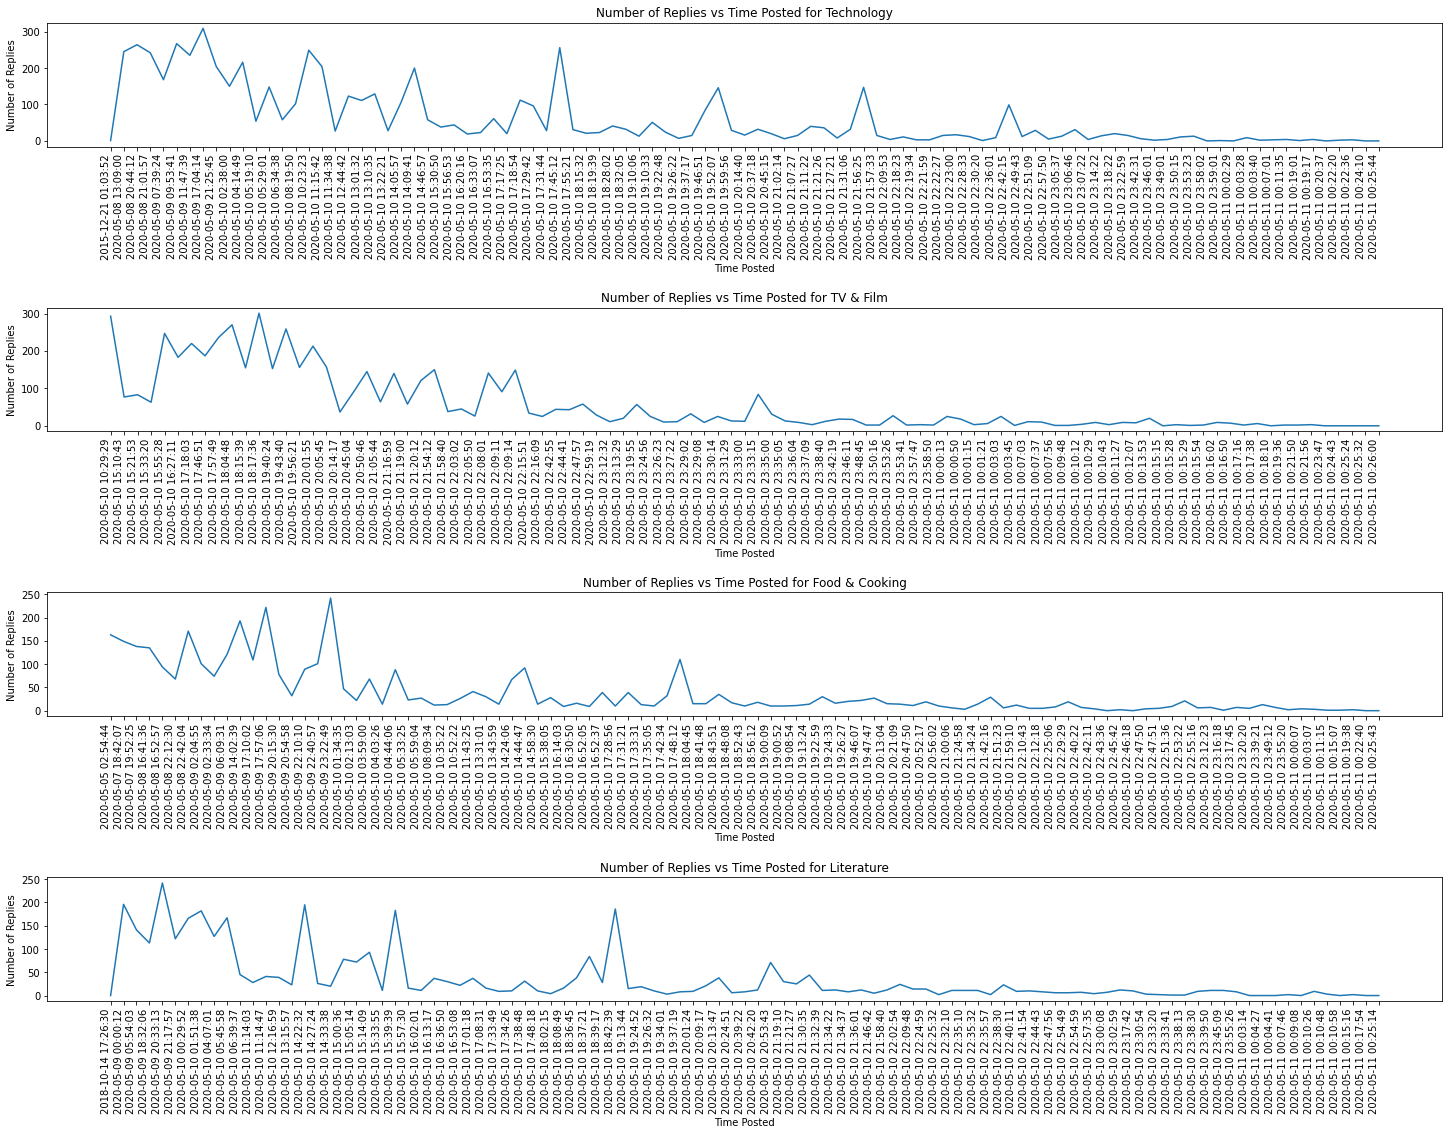

In [238]:
fig, axs = plt.subplots(4, 1,figsize = (25, 18))
df_gs = df_g.sort_values(['Time'])
df_tvs = df_tv.sort_values(['Time'])
df_cks = df_ck.sort_values(['Time'])
df_lits = df_lit.sort_values(['Time'])

axs[0].plot(df_gs['Time'],df_gs['Number_of_Replies'])
axs[0].set_title('Number of Replies vs Time Posted for Technology')
axs[0].set_xlabel('Time Posted')
axs[0].set_ylabel('Number of Replies')
axs[1].plot(df_tvs['Time'],df_tvs['Number_of_Replies'])
axs[1].set_title('Number of Replies vs Time Posted for TV & Film')
axs[1].set_xlabel('Time Posted')
axs[1].set_ylabel('Number of Replies')
axs[2].plot(df_cks['Time'],df_cks['Number_of_Replies'])
axs[2].set_title('Number of Replies vs Time Posted for Food & Cooking')
axs[2].set_xlabel('Time Posted')
axs[2].set_ylabel('Number of Replies')
axs[3].plot(df_lits['Time'],df_lits['Number_of_Replies'])
axs[3].set_title('Number of Replies vs Time Posted for Literature')
axs[3].set_xlabel('Time Posted')
axs[3].set_ylabel('Number of Replies')
plt.setp(axs[0].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(axs[1].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(axs[2].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(axs[3].get_xticklabels(), rotation=90, horizontalalignment='right')
plt.subplots_adjust(hspace=1.3) 
plt.show()

#### Observation : In all 4 categories, there has been more activity during early evening and late night.
There are two outlier data points (first point) in Technology and Literature which is due to threads being pinned to the top. 

#d) Sentiment Analysis on Content : Polarity and Subjectvity

In [0]:
def sentiment_analysis(df):
  a=[]
  b=[]
  for i in range(0,len(df)):
    a.append(TextBlob(str(df['Content'][i])).polarity)
    b.append(TextBlob(str(df['Content'][i])).subjectivity)
  df['Polarity']=a
  df['Subjectivity']=b
  return df

####Polarity Ratings

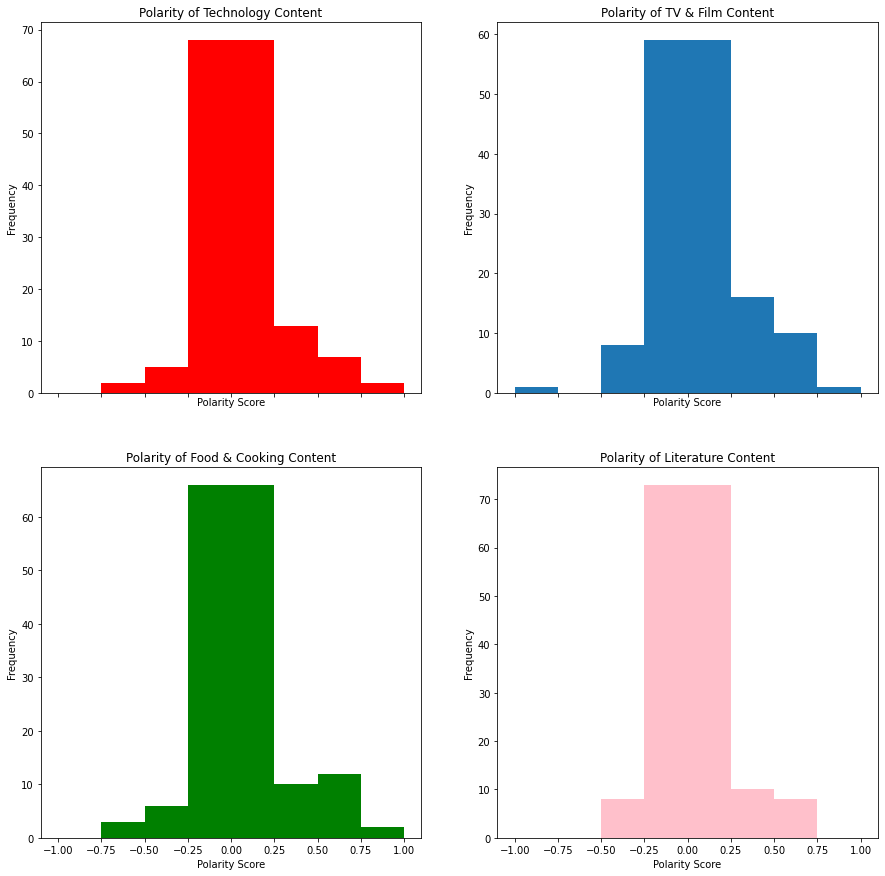

In [235]:
(fig, ([ax1, ax2], [ax3 ,ax4])) = plt.subplots(2, 2, sharex=True,figsize=(15, 15))
ax1.hist(sentiment_analysis(df_g)['Polarity'], bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],color="red")
ax1.set_title('Polarity of Technology Content')
ax1.set_xlabel('Polarity Score')
ax1.set_ylabel('Frequency')
ax2.hist(sentiment_analysis(df_tv)['Polarity'], bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1])
ax2.set_title('Polarity of TV & Film Content')
ax2.set_xlabel('Polarity Score')
ax2.set_ylabel('Frequency')
ax3.hist(sentiment_analysis(df_ck)['Polarity'], bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],color="green")
ax3.set_title('Polarity of Food & Cooking Content')
ax3.set_xlabel('Polarity Score')
ax3.set_ylabel('Frequency')
ax4.hist(sentiment_analysis(df_lit)['Polarity'], bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],color="pink")
ax4.set_title('Polarity of Literature Content')
ax4.set_xlabel('Polarity Score')
ax4.set_ylabel('Frequency')
plt.show()

####Observation : Notice that most of the posts have a neutral polarity score in all catgories and a proportion of positive content. TV & Film has some posts that are very negative in nature followed by Literature. 

Subjectivity Ratings

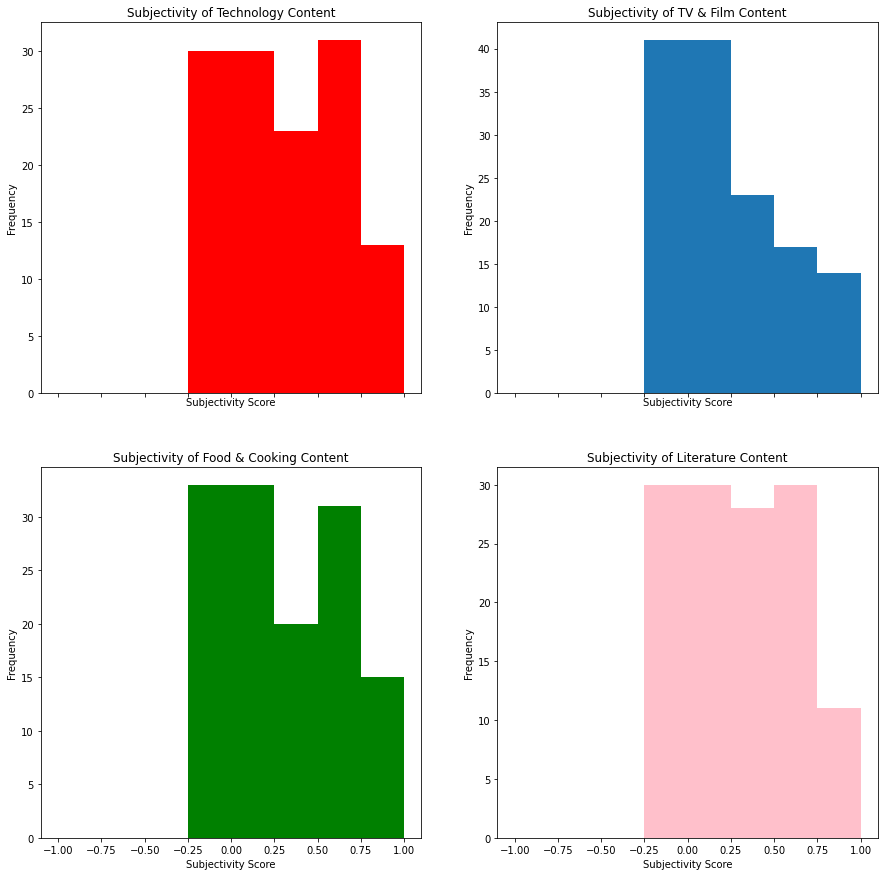

In [236]:
(fig, ([ax1, ax2], [ax3 ,ax4])) = plt.subplots(2, 2, sharex=True,figsize=(15, 15))
ax1.hist(sentiment_analysis(df_g)['Subjectivity'], bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],color="red")
ax1.set_title('Subjectivity of Technology Content')
ax1.set_xlabel('Subjectivity Score')
ax1.set_ylabel('Frequency')
ax2.hist(sentiment_analysis(df_tv)['Subjectivity'], bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1])
ax2.set_title('Subjectivity of TV & Film Content')
ax2.set_xlabel('Subjectivity Score')
ax2.set_ylabel('Frequency')
ax3.hist(sentiment_analysis(df_ck)['Subjectivity'], bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],color="green")
ax3.set_title('Subjectivity of Food & Cooking Content')
ax3.set_xlabel('Subjectivity Score')
ax3.set_ylabel('Frequency')
ax4.hist(sentiment_analysis(df_lit)['Subjectivity'], bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],color="pink")
ax4.set_title('Subjectivity of Literature Content')
ax4.set_xlabel('Subjectivity Score')
ax4.set_ylabel('Frequency')
plt.show()

####Observation : The range of subjectivity scores is the same for all categories.

#**3) Discriminative Analysis**
### Pre-processing Data - LEVEL 2 : lower case, remove stopwords, lemmatize content data

In [0]:
from nltk.corpus import wordnet

# Function to get tags based on type of word
def get_pos(word):
    set_tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(set_tag, wordnet.NOUN)

# Function to pre-process data
def pre_processing(df):
  df_con=df['Content']
  df_con=pd.Series(df_con)
  lemmatizer = WordNetLemmatizer()
  df_con = df_con.apply(lambda x: " ".join([Word(word).lower() for word in x.split()]))
  df_con = df_con.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  df_con = df_con.apply(lambda x: " ".join(
        [lemmatizer.lemmatize(w, get_pos(w)) for w in nltk.word_tokenize(x)]))
  df['Lemmatized_Content']=df_con
  return df

In [0]:
df_tv=pre_processing(df_tv)
df_g=pre_processing(df_g)
df_ck=pre_processing(df_ck)
df_lit=pre_processing(df_lit)

# a) Word Cloud Based on Frequency of Words

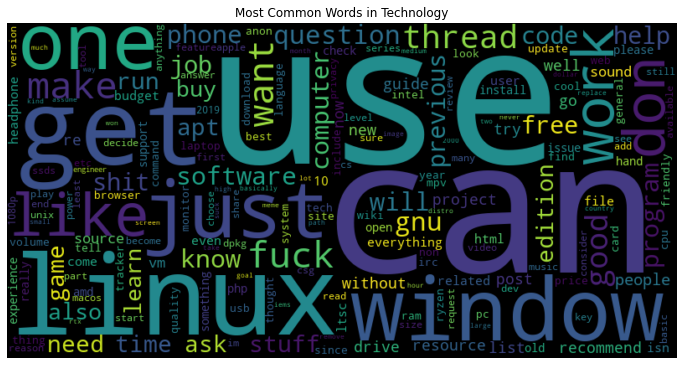

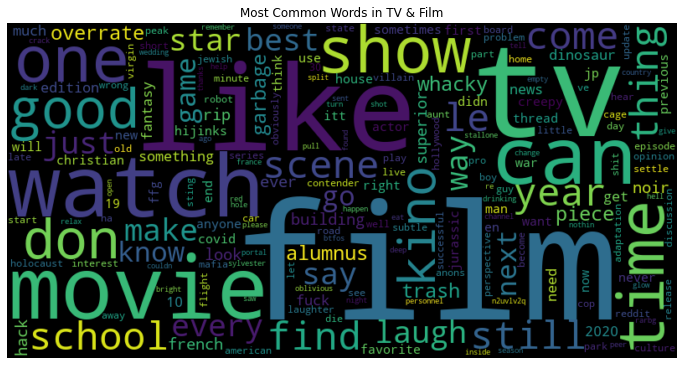

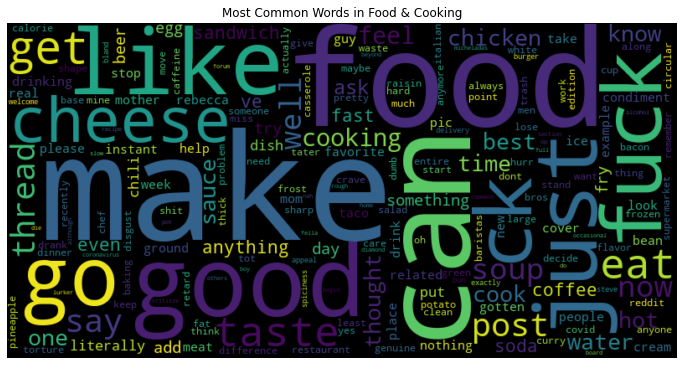

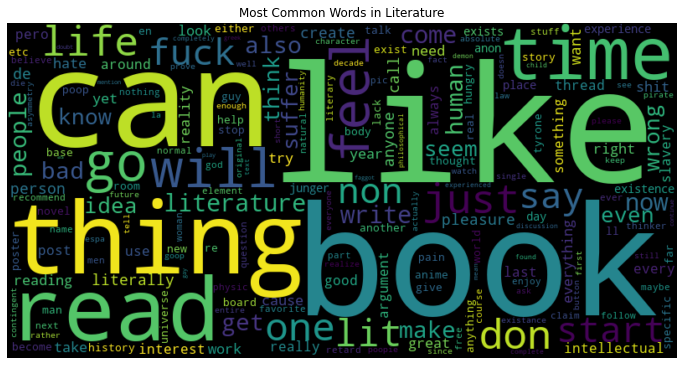

In [229]:
# Function to generate ngram of words
def ngram_generation(df):
  df_con=df['Lemmatized_Content']
  vec = CountVectorizer(ngram_range=(1, 1)).fit(df_con)
  bag_of_words = vec.transform(df_con)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [[word, sum_words[0, idx]] for word, idx in vec.vocabulary_.items()]
  return words_freq

# Function to generate wordcloud
def cloudplot(df):
  data = dict((words[0], words[1]) for words in ngram_generation(df))
  wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)
  plt.figure(figsize=(12, 10))
  plt.title('Most Common Words in ' + str(df['Genre'][0]))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()

cloudplot(df_g)
cloudplot(df_tv)
cloudplot(df_ck)
cloudplot(df_lit)

####Observation : The most commonly occuring words can be seen in the wordclouds for all categories.

# b) Feature Analysis Based on TF-IDF Score

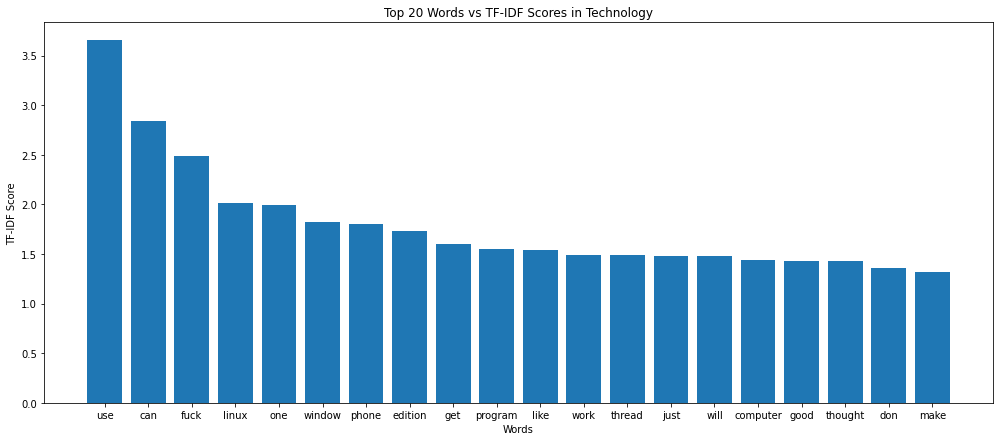

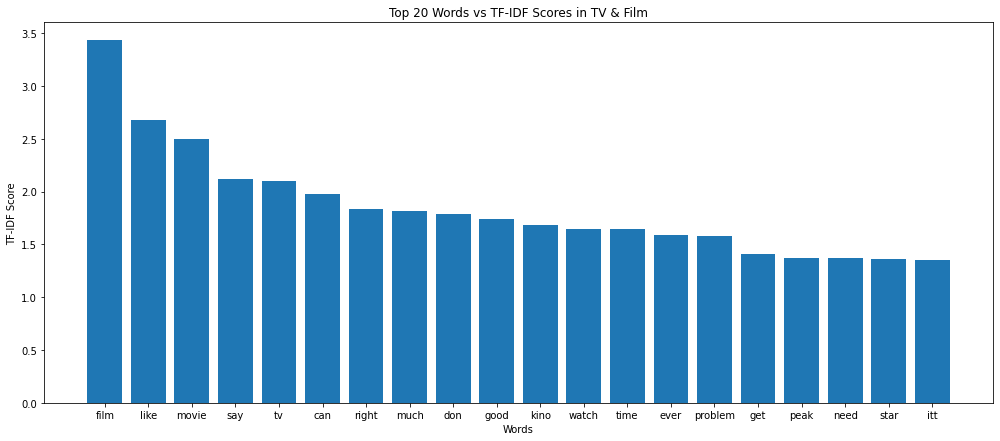

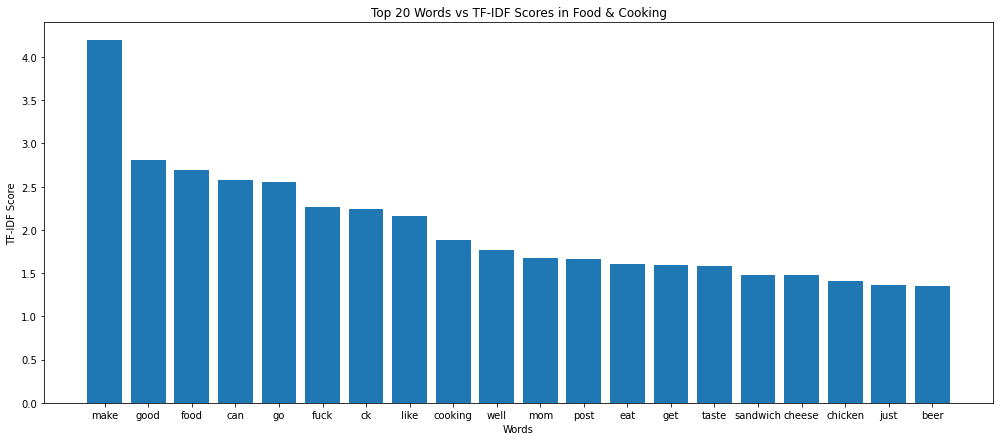

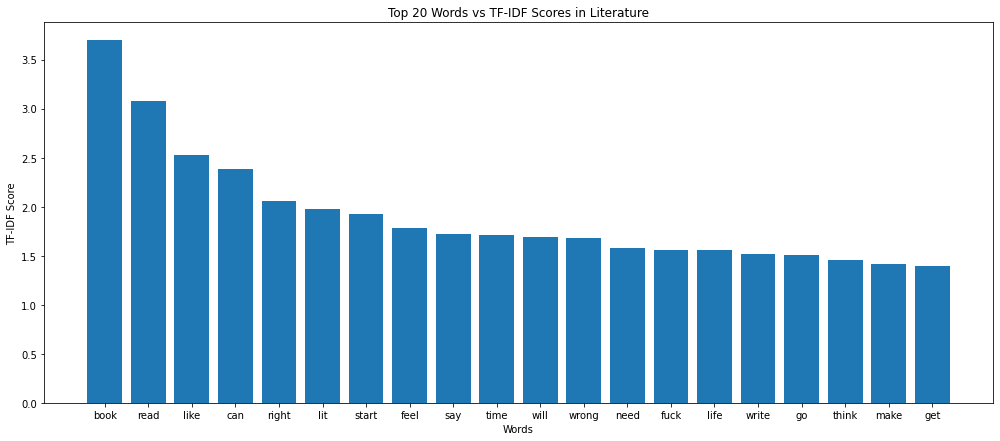

In [230]:
# Function to calculated tf-idf score and extract top 20 features
def tfidf_calculation(df):
  df_con=df['Lemmatized_Content']
  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform(df_con)
  feature_names = vectorizer.get_feature_names()
  top_n = 20

  top20features= sorted(list(zip(vectorizer.get_feature_names(), 
                                              vectors.sum(0).getA1())), 
                                  key=lambda x: x[1], reverse=True)[:top_n]
  return top20features

# Function to generate tf-idf score plot for all 4 categories
def scoreplot(df):
    plt.figure(figsize=(17, 7))
    plt.title('Top 20 Words vs TF-IDF Scores in '+ str(df['Genre'][0]))
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.bar(*zip(*tfidf_calculation(df)))
    plt.show()

scoreplot(df_g)
scoreplot(df_tv)
scoreplot(df_ck)
scoreplot(df_lit)    

####Observation : I used the TF-IDF score to calculate the most important keywords/features for all categories. While the results align with the results from the wordclouds for 3 categories, 'know' has maximum score in Technology whereas the wordcloud displayed 'can' as the most occuring word. 

Although stopwords were removed before this analysis, it might be worth looking into other commonly used words such as 'can','know','will',etc to see why they got high scores. 

#**4) Topic Modeling Using Catgeorical Encoding and Cross Validation**

In [231]:
# Append all 4 data frames into one (df_f)
df_f=pd.concat([df_g,df_tv,df_ck,df_lit],ignore_index=True)
df_f.sort_values(by='Time', ascending=False,inplace=True)    
df_f=df_f.reset_index()
df_f.drop(['index'],axis=1,inplace=True)
df_f

,Post_ID,Genre,Name,Subject,Content,Time,Number_of_Replies,Last_Modified,Polarity,Subjectivity,Lemmatized_Content
0,133561779,TV & Film,Anonymous,NaN,n2UvlV2Q OFF TO FRANCE OUR BOYS WERE SENT,2020-05-11 00:26:00,0,1589156760,0.000000,0.000000,n2uvlv2q france boy sent
1,75849145,Technology,Anonymous,Money from programming,im a fast learner and absolutely desperate Wha...,2020-05-11 00:25:44,0,1589156744,0.316071,0.592857,im fast learner absolutely desperate best way ...
2,14065744,Food & Cooking,Anonymous,Bye Yelp,What are some of the other GOOD things CoronaV...,2020-05-11 00:25:43,0,1589156743,0.287500,0.487500,good thing coronavirus do
3,133561761,TV & Film,Anonymous,NaN,BTFOs rarbg nothin personnel,2020-05-11 00:25:32,0,1589156732,0.000000,0.000000,btfos rarbg nothin personnel
4,133561757,TV & Film,Anonymous,NaN,Give me some good kinos from this country,2020-05-11 00:25:24,0,1589156724,0.700000,0.600000,give good kino country
...,...,...,...,...,...,...,...,...,...,...,...
385,14048649,Food & Cooking,Anonymous,ITT Post what you ate today,Fries with Mayo and Ketchup Lox Sandwich 2 Ch...,2020-05-07 19:52:25,138,1589156381,-0.600000,0.950000,fry mayo ketchup lox sandwich 2 cheese salami ...
386,14048345,Food & Cooking,Anonymous,The envy of Americucks and Europoors,R8 my authentic Poutine delivery from Belle Pr...,2020-05-07 18:42:07,149,1589156666,0.500000,0.750000,r8 authentic poutine delivery belle province m...
387,14033631,Food & Cooking,Anonymous,TEA Tea general,whats your favorite tea Recently bought some d...,2020-05-05 02:54:44,163,1589152698,0.250000,0.625000,whats favorite tea recently bought darjeeling ...
388,11931854,Literature,Anonymous,Welcome to lit,lit is for the discussion of literature speci...,2018-10-14 17:26:30,0,1539537998,0.121488,0.443595,lit discussion literature specifically book fi...


Categorical encoding of Genres using sklearn

In [232]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(df_f['Genre'])
print(y)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

[2 3 0 2 2 1 2 3 2 0 3 3 2 2 3 0 2 3 3 2 1 2 2 2 2 2 2 2 1 2 0 2 2 3 2 0 1
 1 2 2 1 2 2 1 2 1 2 2 3 1 1 2 3 3 1 0 2 3 2 2 2 2 0 3 2 3 2 1 0 2 2 3 2 3
 0 3 2 2 3 1 3 2 1 0 2 1 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 3 0 2 3 0 1 0 3
 2 2 0 3 3 3 1 1 2 3 1 0 1 1 0 0 3 3 2 1 0 0 0 0 1 2 0 2 3 0 1 0 1 1 3 1 1
 1 1 3 0 3 1 0 1 3 3 3 3 3 2 2 0 0 3 1 2 2 2 2 2 1 0 2 1 3 3 2 0 1 0 1 1 0
 1 1 3 1 3 0 1 3 2 1 2 2 3 3 2 3 0 0 1 0 2 0 3 2 1 1 3 1 0 3 2 1 0 1 2 2 1
 3 2 3 0 3 0 2 2 1 3 1 1 0 3 1 0 0 3 1 0 3 3 0 0 0 0 0 0 0 1 0 1 1 1 3 3 3
 2 2 3 1 2 0 1 2 3 1 0 2 3 0 1 0 1 1 0 3 0 3 0 3 2 3 1 1 3 1 0 0 1 3 0 2 3
 0 1 1 1 3 2 1 0 1 2 3 2 1 2 1 1 0 3 0 1 1 0 1 3 3 0 0 3 1 3 3 3 1 0 3 3 1
 1 0 0 2 3 3 0 1 3 0 1 0 3 3 0 3 1 0 0 3 0 1 0 1 0 0 0 3 1 0 1 0 1 0 0 3 0
 3 3 3 0 1 0 0 1 0 0 3 3 0 0 3 0 0 0 1 3]


Cross-validation using 10 splits on the data. Content classified using a One vs Rest classifier. 

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=False)
x_vec = tfidf_vectorizer.fit_transform(df_f['Lemmatized_Content'])
c=1
for train,val in skf.split(x_vec,y):
  print('Set : ',c)
  c+=1
  xtrain, xval = x_vec[train], x_vec[val]
  ytrain, yval = y[train], y[val]
  # xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
  # xval_tfidf = tfidf_vectorizer.transform(xval)
  lreg = LogisticRegression()
  clfr = OneVsRestClassifier(lreg)
  clfr.fit(xtrain, ytrain)
  y_pred = clfr.predict(xval)
  df_r = pd.DataFrame({'Actual Genre': label_encoder.inverse_transform(yval),'Predicted Genre' :label_encoder.inverse_transform(y_pred)})
  print(df_r)

Set :  1
      Actual Genre Predicted Genre
0        TV & Film       TV & Film
1       Technology      Technology
2   Food & Cooking       TV & Film
3        TV & Film  Food & Cooking
4        TV & Film       TV & Film
5       Literature  Food & Cooking
6        TV & Film       TV & Film
7       Technology  Food & Cooking
8        TV & Film       TV & Film
9   Food & Cooking  Food & Cooking
10      Technology       TV & Film
11      Technology  Food & Cooking
12       TV & Film       TV & Film
13       TV & Film      Technology
14      Technology      Technology
15  Food & Cooking  Food & Cooking
16       TV & Film      Technology
17      Technology  Food & Cooking
18      Technology      Technology
19       TV & Film      Technology
20      Literature       TV & Film
21       TV & Film      Literature
22      Literature      Literature
23  Food & Cooking  Food & Cooking
24      Technology      Technology
25  Food & Cooking  Food & Cooking
26      Literature      Technology
27      Lit

#### Evaluation Metrics

In [234]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clfr, x_vec, y, cv=10)
print('Scores',scores)
# F1 score for the last set
print('F1 score last set : ',f1_score(yval, y_pred, average="micro"))


Scores [0.64102564 0.69230769 0.58974359 0.66666667 0.66666667 0.56410256
 0.64102564 0.66666667 0.69230769 0.74358974]
F1 score last set :  0.7435897435897437


Cross validation helped in efficient feature learning for this model. The model can be trained on more data from different categories and should be evaluated based on that as well.

# 5) Future Work: 
1. Get an idea about the positive and negative keywords used in posts and determine which category they might belong to. 
2. Study the influence of slang words on content and perform necessary pre-processing or analysis based on the findings.
3. Initially added the Date_Modified column to measure the rate of activity in each category - perform further analysis on this. 
4. Topic Modelling based on LDA/LSA methods to understand most spoken about topics in each category.
5. Similar text analysis of replies for all these threads.

Thank you for taking the time to read this!